In [1]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2023-08-16 21:44:35--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.194.128, 173.194.195.128, 173.194.196.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.04s   

2023-08-16 21:44:35 (145 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [2]:
import json

# Load the JSON file
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)

# Initialize the lists
sentences = []
labels = []

# Collect sentences and labels into the lists
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [53]:
# Number of examples to use for training
training_size = 20000

# Vocabulary size of the tokenizer
vocab_size = 1000

# Maximum length of the padded sequences
max_length = 16

# Output dimensions of the Embedding layer
embedding_dim = 16

In [54]:
# Split the sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

# Split the labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [55]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [56]:
# Parameters for padding and OOV tokens
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [57]:
# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [58]:
import tensorflow as tf

In [59]:
# Initialize a GlobalAveragePooling1D (GAP1D) layer
gap1d_layer = tf.keras.layers.GlobalAveragePooling1D()

# Define sample array
sample_array = np.array([[[10,2],[1,3],[1,1]]])

# Print shape and contents of sample array
print(f'shape of sample_array = {sample_array.shape}')
print(f'sample array: {sample_array}')

shape of sample_array = (1, 3, 2)
sample array: [[[10  2]
  [ 1  3]
  [ 1  1]]]


In [60]:
# Pass the sample array to the GAP1D layer
output = gap1d_layer(sample_array)

# Print shape and contents of the GAP1D output array
print(f'output shape of gap1d_layer: {output.shape}')
print(f'output array of gap1d_layer: {output.numpy()}')

output shape of gap1d_layer: (1, 2)
output array of gap1d_layer: [[4 2]]


In [68]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 16, 16)            16000     
                                                                 
 global_average_pooling1d_11  (None, 16)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_12 (Dense)            (None, 32)                544       
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,577
Trainable params: 16,577
Non-trainable params: 0
_________________________________________________________________


In [69]:
# Compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [70]:
num_epochs = 30

# Train the model
history = model.fit(training_padded, training_labels, epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 2s - loss: 0.5069 - accuracy: 0.7417 - val_loss: 0.4080 - val_accuracy: 0.8125 - 2s/epoch - 4ms/step
Epoch 2/30
625/625 - 1s - loss: 0.3760 - accuracy: 0.8295 - val_loss: 0.4024 - val_accuracy: 0.8098 - 1s/epoch - 2ms/step
Epoch 3/30
625/625 - 1s - loss: 0.3647 - accuracy: 0.8328 - val_loss: 0.4007 - val_accuracy: 0.8126 - 1s/epoch - 2ms/step
Epoch 4/30
625/625 - 2s - loss: 0.3595 - accuracy: 0.8356 - val_loss: 0.4047 - val_accuracy: 0.8150 - 2s/epoch - 3ms/step
Epoch 5/30
625/625 - 2s - loss: 0.3568 - accuracy: 0.8377 - val_loss: 0.4034 - val_accuracy: 0.8140 - 2s/epoch - 3ms/step
Epoch 6/30
625/625 - 1s - loss: 0.3550 - accuracy: 0.8384 - val_loss: 0.4066 - val_accuracy: 0.8097 - 1s/epoch - 2ms/step
Epoch 7/30
625/625 - 1s - loss: 0.3531 - accuracy: 0.8393 - val_loss: 0.4072 - val_accuracy: 0.8123 - 1s/epoch - 2ms/step
Epoch 8/30
625/625 - 1s - loss: 0.3527 - accuracy: 0.8418 - val_loss: 0.4079 - val_accuracy: 0.8141 - 1s/epoch - 2ms/step
Epoch 9/30
625/625 - 1s 

**Looking at Loss**: Loss dexcribes how confident the model in in predicting new unseen data (this case, the validation set). Tweaking the hyperparameters will influence the loss and prediction accuracy of the model. We can check for different `vocab_size`, `max_length`, as well as the `embedding_dim` (vector size representing each word).

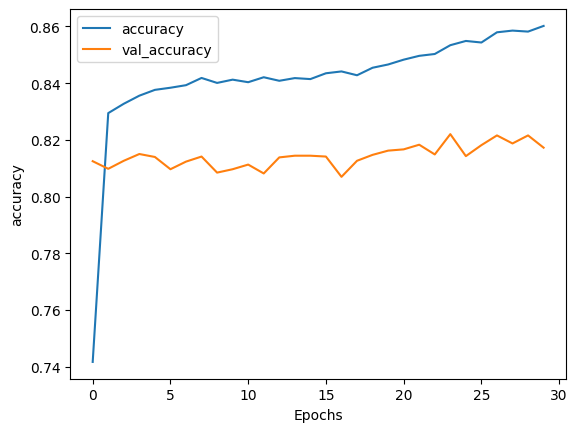

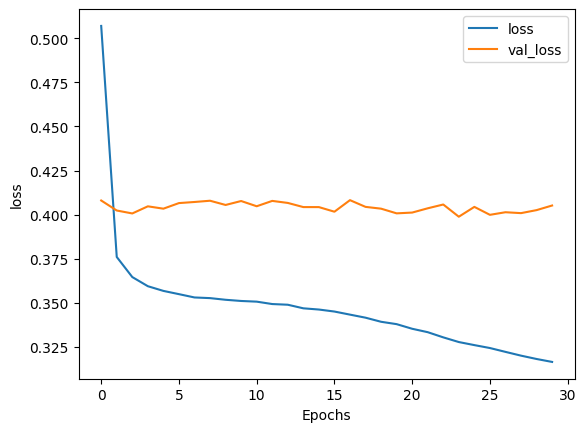

In [71]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

After trying different hyperparameters, observe how the validation loss plateaus over time, even as the training loss decreases. Although it is better than the case where the validation loss increases (meaning, the model is less confident in predicting new inputs), the accuracy of the model is still questionable.  

In [72]:
# Get the index-word dictionary
reverse_word_index = tokenizer.index_word

# Get the embedding layer from the model (i.e. first layer)
embedding_layer = model.layers[0]

# Get the weights of the embedding layer
embedding_weights = embedding_layer.get_weights()[0]

# Print the shape. Expected is (vocab_size, embedding_dim)
print(embedding_weights.shape)

(1000, 16)


In [73]:
import io

In [76]:
# Open writeable files
out_v = io.open('vecs_bcs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta_bcs.tsv', 'w', encoding='utf-8')

# Initialize the loop. Start counting at `1` because `0` is just for the padding
for word_num in range(1, vocab_size):

  # Get the word associated at the current index
  word_name = reverse_word_index[word_num]

  # Get the embedding weights associated with the current index
  word_embedding = embedding_weights[word_num]

  # Write the word name
  out_m.write(word_name + "\n")

  # Write the word embedding
  out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n")

# Close the files
out_v.close()
out_m.close()

In [77]:
# Import files utilities in Colab
try:
  from google.colab import files
except ImportError:
  pass

# Download the files
else:
  files.download('vecs_bcs.tsv')
  files.download('meta_bcs.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>